# Fuga de Clientes en las Entidades Financieras

El objetivo de este modelo será detectar aquellas características de los clientes financieros que permitan pronosticar quiénes tienen mayor probabilidad de retirarse de la entidad financiera (fuga de clientes) y quiénes permaneceran por mayor tiempo en la entidad.

Para el desarrollo de este modelo recurrimos a la base de datos pública expuesta por Kagle en la siguiente URL: https://www.kaggle.com/sonalidasgupta95/churn-prediction-of-bank-customers


## PARTE 1. Problemática

En las primeras líneas se señala la problemática a abodar con este modelo  y es "prevenir la fuga de clientes" mediante la predicción de aquellos clientes que por sus características presentan mayores indicios de cancelar sus productos financieros y finalizar su relación comercial con la entidad financiera. Por lo tanto, el modelo dará como resultado un pronóstico que indique si el cliente continúa o se retira de la entidad.

Para el modelo se dispone de la siguiente información de los clientes:

### 1.1 Variables

CustomerID: Identificación del cliente al interior de la entidad financiera.
Surname: Apellido del cliente. No se requiere tener el nombre completo.
CreditScore: Calificación crediticia del cliente de acuerdo a los modelos internos del banco de calificación del riesgo del cliente.
Geography: País de residencia del cliente.
Gender: Género del cliente.
Age: Edad del cliente.
Tenure: Antiguedad del cliente en el banco.
Balance: Saldo del cliente en el banco.
NumOfProducts: Núemero de productos que tiene el cliente con el banco.
HasCrCard: Indica sin el cliente tiene o no tarjeta de crédito con el banco.
IsActiveMember: Indicador de cliente Activo/Inactivo en el banco.
EstimatedSalary: Salario estimado para el cliente.
Exited: Es la variable objetivo (target) para el entrenamientos y validación del modelo de predicción a construir. Para esta variable, el valor cero (0) indica que el cliente permanece en la entidad y el valor uno (1) que el cliente se fuga o retira de la entidad financiera.

Al revisar las variables disponibles con la información de los clientes, se podría pensar que las variables más relevantes para predecir la permanencia de un cliente son las siguientes:

- CreditScore ya que indica el nivel de riesgo de crédito del cliente y se espera que los de mayor riesgo tengan una mayor posibilidad de retirarse del banco
- Tenure o antiguedad del cliente, pues se espera que a mayor antiguedad la probabilidad de retiro sea menor
- Age o edad del cliente -la cual podría estár muy correlacionada con la antigueda- pues se puede encontrar que una proporción significativa de clientes que se retiran seán clientes de mayor edad.
- IsActiveMember ya que esperaría que a mayor actividad del cliente menor sea la posibilidad de retirarse del banco
- NumOfProducts o número de productos abiertos por el cliente en el banco se espera que estén asociados con la permanencia del cliente, pues a mayor número de productos se entiende mayor satisfacción del cliente con los productos del banco.

Pero será con el Análisis Exploratorio de Datos que finalmente se determinaran las variables que ayudarán a generar la mejor predicción posible.


## 2. PARTE 2. EDA- Análisis Exploratorio de Datos

En las siguientes líneas se analiza los tipos de datos de la base de datos y cómo se comportan con el fin de entender a mayor profundidad cada una de los mimos, como se correlacionan entre sí y principalmente para identificar cuáles serán las variables predictoras más apropiadas para resolver la problemática: "Predecir la fuga de clientes de la entidad financiera"

###  Preparación de los datos

En primer lugar se prepara el entorno de trabajo del notebook importando las librerías que más se utilizarán y cargando la base de datos. Con seguridad, a medida que se avance en el desarrollo de este notebook, se importarán otras librerías.

In [1]:
## CARGA DE LAS LIBRERÍAS REQUERIDAS PARA TRABAJAR CON LA BASE DE DATOS

import numpy as np        ##librería para realizar arreglos sobre los datos
import pandas as pd       ##librería para trabjar la BD como un DataFrame
import matplotlib as plt  ##libraría para el análisis gráfico de la información
import seaborn as sns     ##librería para potenciar en análisis gráfico de la información


In [2]:
##CARGUE DE LA BASE DE DATOS "Churn_Modelling" obtenida de Kagle

churn= pd.read_csv('Churn_Modelling.csv', sep=',')

# con la siguiente instrucción se da a conocer la forma de la BD, es decir, cuántas filas y columnas tiene

print('El número de filas y columnas es respectivamente', churn.shape)

El número de filas y columnas es respectivamente (10000, 14)


In [3]:
#las siguientes líneas proporcionan una vista inicial de la BD

churn.head()  #primeras 5 líneas de la BD
#churn.tail()  #últimas 5 líneas de la BD

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


En las líneas anteiores se aprecia la columna "RowNumber" la cual hace referencia al número de registro en la BD y que para este análisis no agrega valor ya que el DataFrame de Pandas maneja su propio número de registro como se observa al lado izquierdo en negrita.
Por lo tanto, se elimina esta columan del dataframe

In [4]:
#borrado de la columna RowNumber
churn.drop(['RowNumber'], axis= 'columns', inplace=True)
churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


En adelante, se profundizará en conocer y comprender los tipos de datos a trabajar y su comportamiento.

In [5]:
# Tipo de dato de cada uno de los campos del dataframe

churn.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Adicionalmente, es importante conocer si la BD contiene datos nulos o campos vacíos, en qué variables y qué cantidad ya que esto podría afectar la precisión del modelo final. Por fortuna, ninguna de las variables contiene datos nulos o vacíos

In [6]:
# esta función suma por columna la catidad de datos nulos

np.sum(pd.isna(churn))  

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
## Resúmen estadístico de las variables numéricas

churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


La sentencia anterior presenta un resumen estadístico como la media, desviación estándar, los cuartiles y valores mínimos y máximos de las variables numéricas. De este resúmen estadístico, se puede inferir a primera vista cómo se distribuyen los datos y qué tan dispersos pueden estar. Al revisar columna por columna, no se encuentra indicios de valores atípicos que puedan afectar los resultados del modelo.

### Descripción estadística de las variables

Las siguientes líneas profundizan en el análisis estadístico de cada una de las variables y de su correlación entre sí.

En los siguientes histogramas se observa la distribución del país de residencia, la tenencia de tarjeta de crédito y la actividad del cliente.

Text(0.5, 1.0, 'Histograma de frecuencias')

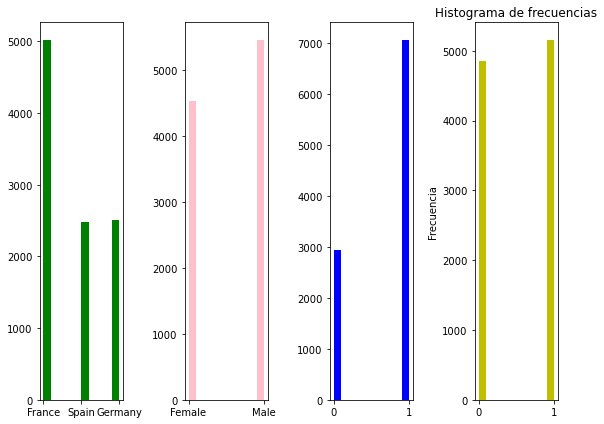

In [8]:
#librerias necesarias para graficar

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#histogramas de frecuencias
fig, axs = plt.subplots(1,4, tight_layout=True)
fig.set_size_inches((8,6))
plt.ylabel('Frecuencia')
axs[0].hist(churn.Geography, density=False, color='g')
axs[1].hist(churn.Gender, density=False, color='pink')
axs[2].hist(churn.HasCrCard, density=False, color='blue')
axs[3].hist(churn.IsActiveMember, density=False, color='y')


plt.title('Histograma de frecuencias')

Los histogramas anteriores indican que:
- el 55% de la muestra son hombres y el 45% mujeres; 
- el 50% de los clientes residen en Francia, el 25% en España y el 25% en Alemania, lo cual podría indicar que la entidad financiera que estamos analizando tiene operaciones sólo en estos tres países.
- Sólo el 30% de los clientes no tienen tarjetas de crédito y,
- Un poco más del 50% son considerados clientes activos en la entidad y el resto como clientes inactivos.

Para conocer el grado de correlación entre las variables, se crea un segundo dataframe en el cual se excluyen aquellos campos que no describen el comportamiento de los clientes como el ID y nombre del cliente.

In [9]:
#CORRELACIÓN DE LAS VARIABLES

data_corr= pd.DataFrame(churn, columns=['Gender','Geography','CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited'])
#data_corr
data_corr.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


De manera general estas variables se encuentran muy poco correlacionadas, es decir, el comportamiento o resultado de las mismas están poco o nada influenciadas por las otras variables.
La relación más fuerte se observa entre el número de productos y el saldo (Balance) del cliente, pero se trata de una relación negativa, es decir, que a mayor número de productos hay una pequeña tendencia a un menor saldo o visceversa. Y al observar la correlación de las variables con la variable objetivo (Exited), la que se correlaciona en mayor medida pero siendo aún una relación muy débil, es la edad como se había sospechado inicialmente.

Basados en los resultados anteriores, es de esperar que gráficamente no se observen tampoco relaciones o tendencias entre las variables y para corroborarlo, la siguiente gráfica representa la distribución entre cada par de variables numéricas y se grafican por país de origen para facilitar la identificación de tendencias por el país de origen sin encontrar relación aparente entre las variables y el país de origen (lo mismo ocurre si se hace por género)

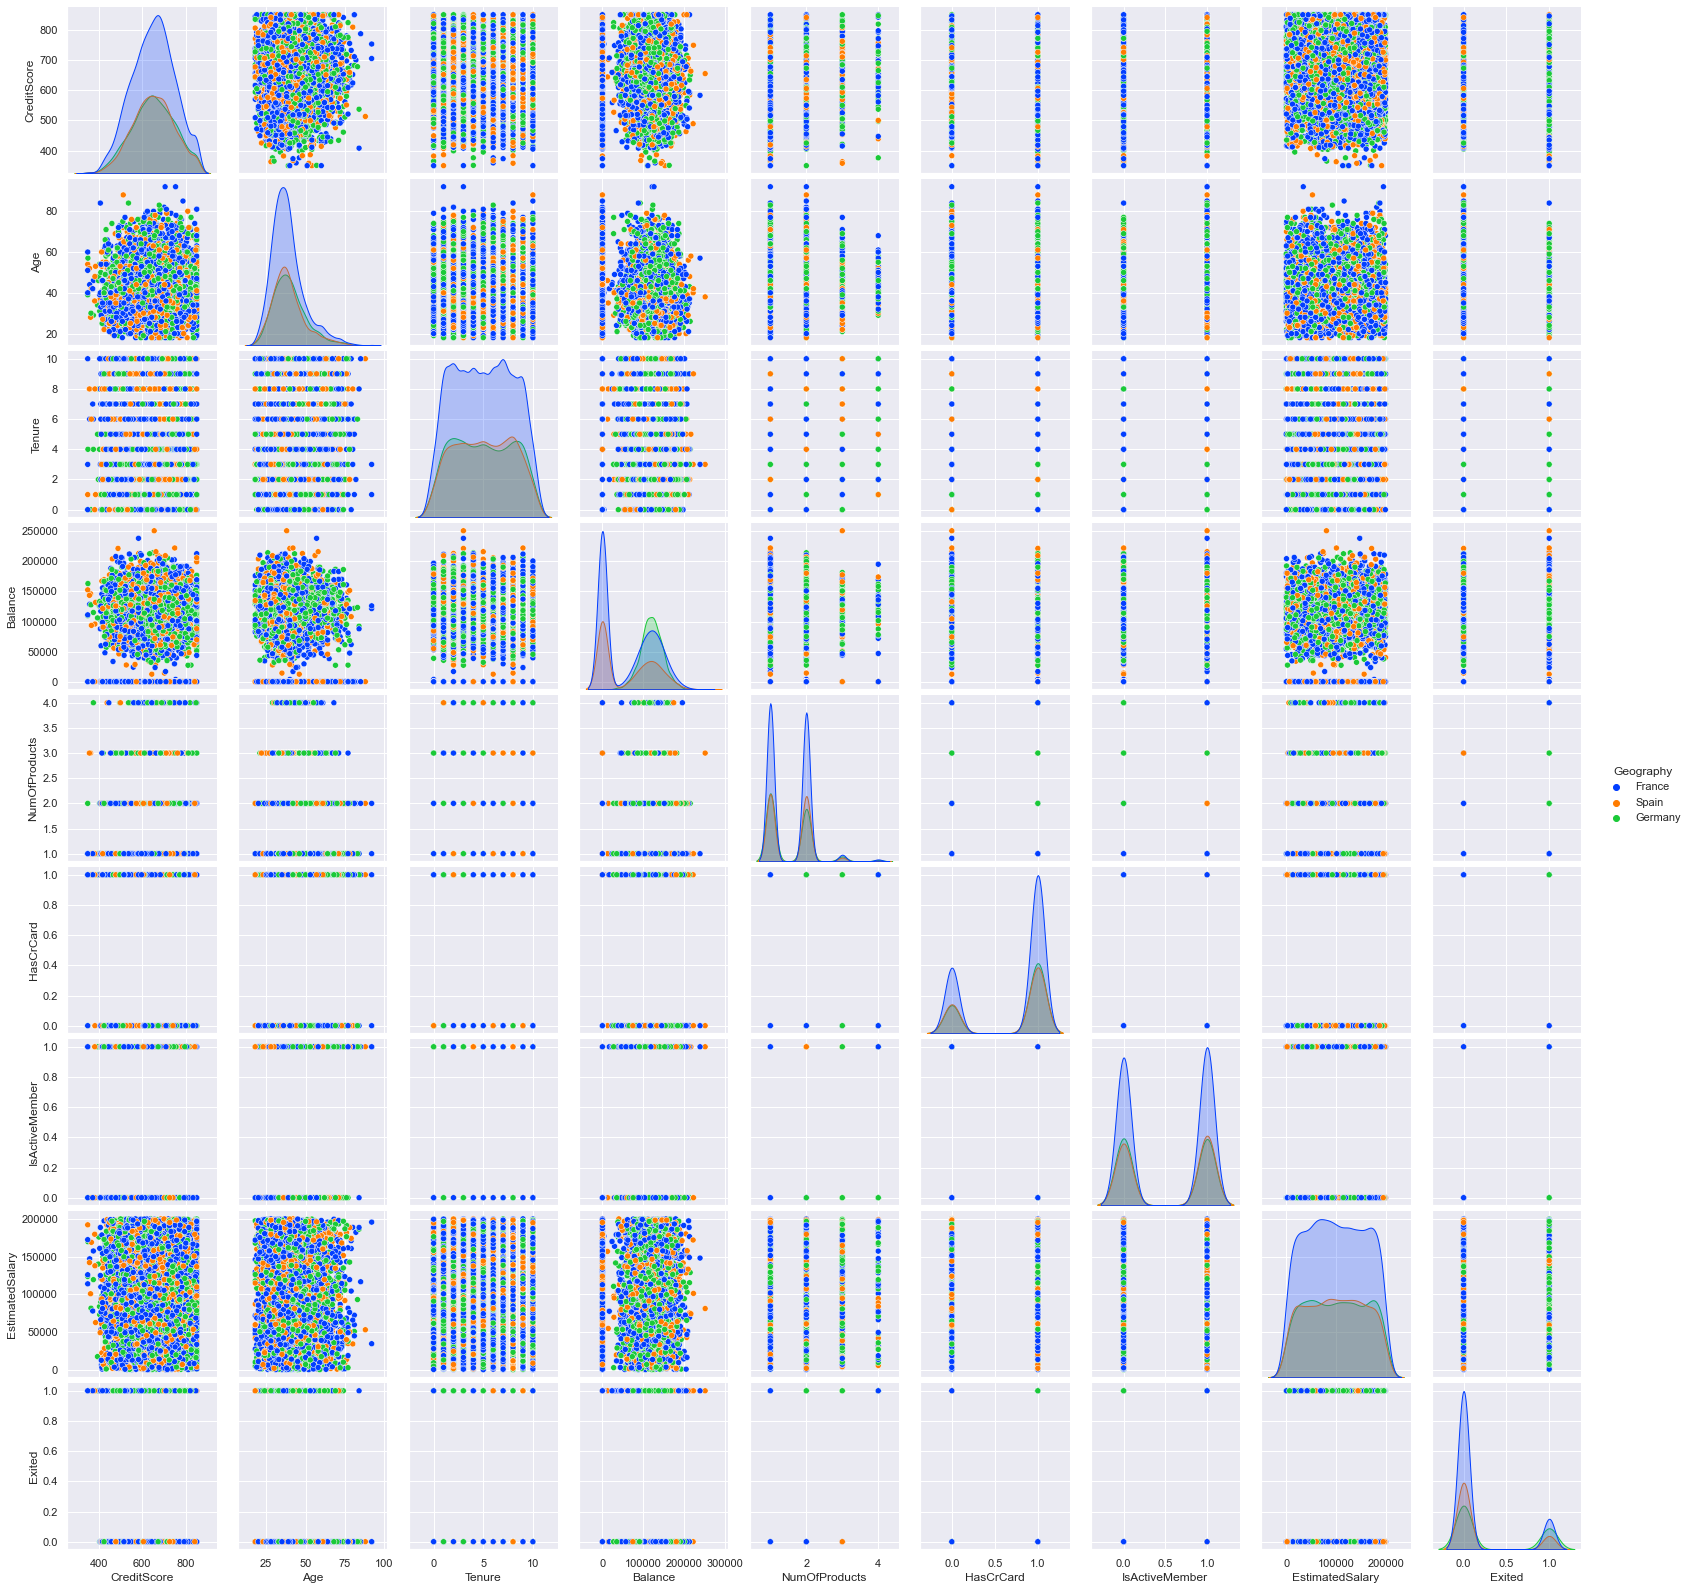

In [10]:
#RELACIÓN POR CADA PAR DE VARIABLES

sns.set()
sns.pairplot(data_corr,hue='Geography', palette= 'bright')

Por cada par de variables no se observan tendencias marcadas en la distribución de los datos. Pero al revisar la distribución de las variables discretas y continuas se aprecia lo siguiente:
- El score de crédito tiende a tener una distribución normal entre los clientes del banco
- La mayor proporción de clientes se concentran en el rango de edad entre 25 y 50 años, por lo cual, si la edad es un factor determinante en la fuga de clientes, se espera contar con indicadores de fuga muy bajos dada la edad promedio de los clientes.
- La antiguedad del cliente en el banco tiende a tener una distribución normal entre 8 y 10 años para los clientes de Francia y de entre 4 y 5 años para los clientes de España y Alemania. Con esto no es suficiente para determinar estos umbrales como una señal de alerta frente a la fuga de los clientes ya que no se tiene información de cuánto tiempo lleva operando la entidad financiera en dichos países.
- La mayoría de los clientes tienen uno o máximo dos productos del banco.
- El salario estimado es mayor en los clientes de Francia respecto a España y Alemania, con una tendencia a una distribución uniforme.

Otra forma de investigar si existe alguna posible relación entre las variables categóricas (País, género, tenencia de tarjéta de crédito y Actividad) con las variables numéricas, es utilizar  la siguiente línea de código en la cual se pueden probar las diferentes combinaciones posibles entre estas variables

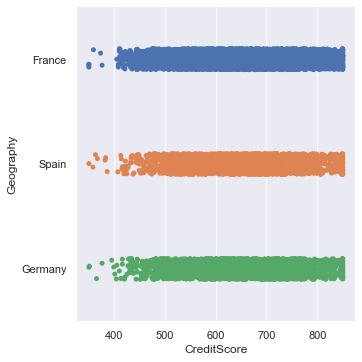

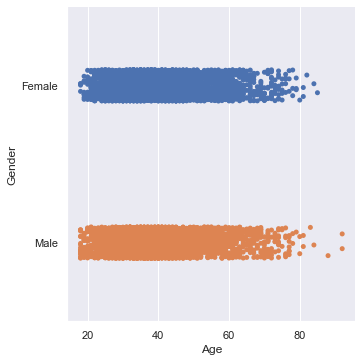

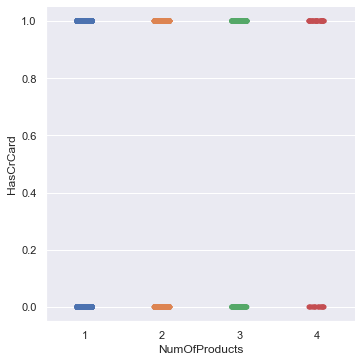

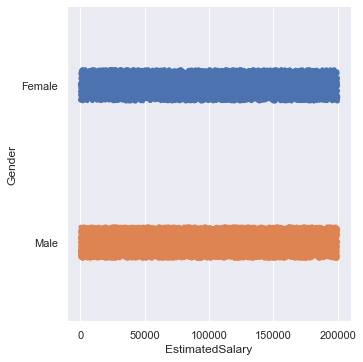

In [11]:
# Relación de variables numéricas con variables categóricas

sns.catplot(data = churn, x = "CreditScore", y = "Geography")
sns.catplot(data = churn, x = "Age", y = "Gender")
sns.catplot(data = churn, x = "NumOfProducts", y = "HasCrCard")
sns.catplot(data = churn, x = "EstimatedSalary", y = "Gender")

Luego de probar cada una de las combinaciones propuestas anteriormente con las variables y la función anterior, no se encontraron comportamientos o tendencias marcadas en las posibles combinaciones de las variables.

En un último esfuerzo y más con la finalidad de demostrar el comportamiento de tres variables, se grafica el número de producto y el Balance diferenciando con el color si es un cliente activo o no, encontrando que hay una distribución uniforme entre estas tres variables, es decir, no se encuentran patrones o tendencias en su comportamiento.

Text(0.5, 1.0, 'Distibució por actividad del # productos vs el saldo')

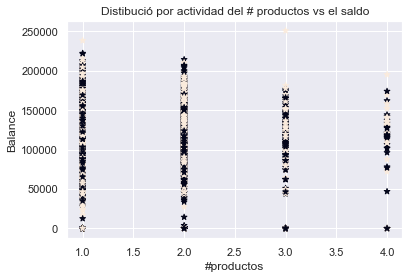

In [12]:
#Distribución del número de productos  y balace según la actividad del cliente en busca de algún comportamiento en su distribución 

plt.scatter(churn.NumOfProducts, churn.Balance, c=churn.IsActiveMember,marker='*')
plt.xlabel('#productos')
plt.ylabel('Balance')
plt.title('Distibució por actividad del # productos vs el saldo')

### Diagrama de Cajas

A continuación se explora los diagramas de caja de cada una de las variables diferenciadas por género/país en busca de valores atípicos o comportamientos en su distribución que no se han apreciado en los gráficos anteriores.

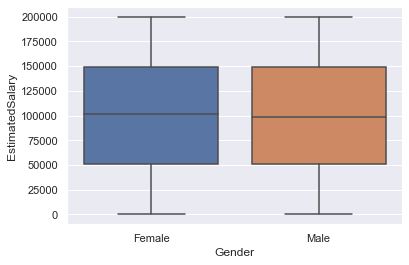

In [13]:
#para facilidad en el cambio de género a país en los siguientes gráficos, se crea la variable g dejando una línea cometariada según se desee
g= churn['Gender']
#g= churn['Geography']

#sns.boxplot(data = churn, x = g, y = "CreditScore")
#sns.boxplot(data = churn, x = g, y = "Age")
#sns.boxplot(data = churn, x = g, y = "Tenure")
#sns.boxplot(data = churn, x = g, y = "Balance")
#sns.boxplot(data = churn, x = g, y = "NumOfProducts")
sns.boxplot(data = churn, x = g, y = "EstimatedSalary")
plt.show()

Al explorar las diagramas de bigotes anteriores tampoco sen encontraron diferencias significativas o valores atípicos importantes a los cuales se les deba prestar mayor atención.

# Modelos de Machine Learning

En esta sección se evaluará dos modelos de clasifificación para predecir si un cliente se fuga o permanece en la entidad financiera. El primero de ellos será un árbol de decisión y el segundo un modelo basado en vecinos más cercanos, para los cuales, se estimará la profundidad y número de vecinos óptimos para cada modelo respectivamente.

Antes de desarrollar ambos modelos y como complemento; se generará de manera previa un tercer modelo que servirá de Benchmark para los arboles de decisión y los vecinos más cercanos, en el cual se modelarán los escenarios de que todos los clientes se fugan y otro escenario donde ningún cliente se fuga, con los cuales se calculará la respectiva exactitud (accuracy) de los modelos.

## Métrica de evaluación

Para la evaluación de los modelos y la selección de uno de ellos, se utilizará como métrica de evaluación la "EXHAUSTIVIDAD", es decir, la proporción de los clientes correctamente pronosticados como fuga respecto a la suma de estos clientes más los clientes que se pronosticó que permanecerían en la entidad pero se fugan (falsos negativos). La excuación para el cálculo de la métrica de evaluación es la siguiente:

### EXHAUSTIVIDAD= (Verdaderos positivos)/(Verdaderos positivos+ Falsos negativos)

La razón de seleccionar esta métrica está en que para la entidad financiera el principal objetivo es identificar aquellos clientes que se fugarán de la entidad y es más crítico un falso negativo (pronosticar que el cliente no se fuga cuando en realidad se fuga) que un faso posivito(pronosticar que el cliente se fuga pero en realidad no se va de la entidad) ya que pierde oportunidad de acción frente a estos clientes para su renteción y de nada le sirve enfocar esfuerzos de retención en clientes que no se piensan retirar de la entidad.

Es por esto último que la Precisión no es la métrica adecuada para el modelo ya que un mal ponótico de fuga sobre un cliente que en la realidad no se va de la entidad no es tan impactante como un mal pronóstico sobre quienes se fugan.

## Escenarios Benchmark

### Escenario en el que todos los clientes se fugan

Este es un escenario pesimista en el cual se supone que todos los clientes se fugarán de la entidad

In [14]:
#Importando las librerías requeridas

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score

In [15]:
## Se calcula que todos los clientes se van de la entidad financiera Exited= 1

y_exited= churn.Exited              #variable objetivo

y_pred = np.ones(y_exited.size)   #predicciones

La exactitud (accuracy) de este escenario, es decir, el porcentaje de clientes cuya predicción fue correcta es la siguiente:

In [16]:
# Porcentaje de aciertos de este escenario
print('La exactitud de este escenario es de: ',accuracy_score(y_exited, y_pred))

La exactitud de este escenario es de:  0.2037


La siguiente matriz representa los aciertos, falsos positivos y falsos negativos del escenario, en el cual se puede ver claramente el objetivo del modelo de predecir que todos los clietnes se fugaban, con 2.037 aciertos (verdaderos positivos) y 7.963 fasos positivos

In [17]:
# matriz de resultados del modelo de predicción
confusion_matrix(y_exited, y_pred)

array([[   0, 7963],
       [   0, 2037]], dtype=int64)

### Escenario en el que ningún cliente se fuga

Este es un escenario optimista en el cual se imagina que ningún cliente se va de la entidad financiera.

In [18]:
## Se calcula que todos los clientes se van de la entidad financiera Exited= 0

y_pred = np.zeros(y_exited.size)   #predicciones

La exactitud de este escenario, es decir, el porcentaje de clientes cuya predicción fue correcta es la siguiente:

In [19]:
# Porcentaje de aciertos de este escenario
print('La exactitud de este escenario es de: ',accuracy_score(y_exited, y_pred))

La exactitud de este escenario es de:  0.7963


La siguiente matriz representa los aciertos, falsos positivos y falsos negativos del escenario, en el cual se puede ver claramente el objetivo del modelo de predecir que ningun cliente se fugaba, con 7963 aciertos (verdaderos negativos) y 2037 fasos negativos

In [20]:
# matriz de resultados del modelo de predicción
confusion_matrix(y_exited, y_pred)

array([[7963,    0],
       [2037,    0]], dtype=int64)

## Selección de las variables predictoras

Antes de desarrollar los modelos de clasificación se deben resolver dos grandes inquietudes:
1. Cuáles variables seleccionar como variables predictoras y,
2. Cuáles son los hiperparámetros óptimos para los modelos de clasificación

Se abordarán estas inquietudes en el orden planteado, para lo cual, lo que se hará es entrenar un arbol de decisión y un modelo de vecinos más cercanos con todas las variables del modelo y se calculará la impartancia de cada variable en cada modelo para seleccionar aquellas con mayor impacto en el modelo.

De manera preliminar y basados en los resultados anteriores de correlación, se espera obtener como variables predictoras importantes el número de productos, balance, la actividad y la edad del cliente.

In [21]:
#Importemos las librerías requeridas para los modelos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [22]:
# Preparación de las variables predictoras "X" y variable objetivo "y"

X= churn[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
#X.head()
y= churn['Exited']

Para la creación de los modelos iniciales, se dejará en blanco el hiperparámetro max_depth para el árbol de decisión el cual se ajustará automáticamente y para el modelo de vecinos más cercanos se definirá el hiperparámetro k=5 el cual utiliza dicha función por defecto.

In [23]:
# Creación de los modelos: árbol de decisión y vecinos más cercanos

tree= DecisionTreeClassifier(random_state=18)
knn= KNeighborsClassifier(n_neighbors=5)

In [24]:
# Entrenamiento de los modelos

tree.fit(X,y)
knn.fit(X,y)

KNeighborsClassifier()

A continuación se calculan las predicciones, la exactitud y la importancia de las variables para el árbol de decisión:

In [25]:
# Predicciones sobre el set de entrenamiento
y_pred = tree.predict(X)

# Comaparamos con las etiquetas reales
print('La exactitud del modelo es de: ',accuracy_score(y_pred,y))

La exactitud del modelo es de:  1.0


C:\Users\jchaverr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


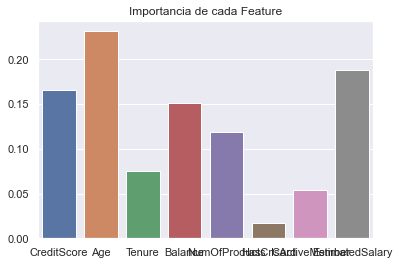

In [26]:
#Gráfica del porcentaje de importancia de las variables en el modelo de predicción

importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

A continuación se calculan las predicciones, la exactitud y la importancia de las variables para los vecinos más cercanos:

In [27]:
# Predicción sobre el set de entrenamieto
y_pred = knn.predict(X)

# Comaparamos con las etiquetas reales
print('La exactitud del modelo es de: ',accuracy_score(y_pred,y))

La exactitud del modelo es de:  0.8163


En los resultados anteriores se observa cómo con todas las variables el arbol de decisión queda sobre entrenado (overfitting) mientras que el modelo de vecinos cercanos tiene una exactitud del 82%.

Por lo anterior y basados en la importancia de cada variable en los modelos de predicción, se seleccionan solo aquellas variables con un nivel de importancia superior al 10%, es decir, se excluyen la antiguedad (Tenure), tenencia de tarjeta de crédito (HasCrCard) y la actvidad del cliente.

## Set de datos de entrenamiento y de prueba

Previo a la optimización de los hiperparámetros de para los modelos de clasificación, se separan los datos con el fin de tener un conjunto de datos para el entrenamiento de los modelos y otro conjunto para la prueba y evaluación de los modelos.
Por lo anterior se entrenará el modelo con el 85% de los datos seleccionados de manera aleatoria y para probar el modelo se utilizará el 15% de datos restantes.

In [28]:
# Variables predictoras

X= churn[['CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']]

#Variable objetivo
y= churn['Exited']

In [29]:
#Datos de prueba y de entrenamiento

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.15, random_state=18)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #validación del tamaño de los sets de datos

(8500, 5) (1500, 5) (8500,) (1500,)


## Optimización de los hiperparámetros

A continuación se determinará la profundidad óptima para el arbol de decisión y el número de vecinos óptimo para el modelo de vecinos cercanos.
El valor óptimo se identifica como aquel que proporcia un nivel de exactitud de modelo (accuracy) significativo y coherente entre los datos de entrenamiento y de prueba, de tal manera que se evite el sobre-entrenamiento o sub-entrenamiento de los modelos. 

### Árboles de decisión

In [30]:
# Listas vacias para los valores de exactitud (accuracy) deseados
accuracy_train = []
accuracy_test = []

# Valores de max_depth a explorar
max_depths = [1,2,3,4,5,6,7,8,9,10,15]

# Generación de modelos y cálculo del accuracy 
for max_depth in max_depths:
    clf_tree = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    clf_tree.fit(X_train,y_train)

    y_train_pred = clf_tree.predict(X_train)
    y_test_pred = clf_tree.predict(X_test)
    accuracy_train.append(accuracy_score(y_train, y_train_pred))
    accuracy_test.append(accuracy_score(y_test, y_test_pred))


Text(0, 0.5, 'Exactitud')

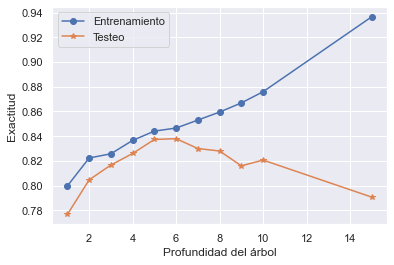

In [31]:
# Gráfica de las profundidades del árbol de decisión vs la exactitud

plt.plot(max_depths,accuracy_train,'o-',label='Entrenamiento' )
plt.plot(max_depths,accuracy_test,'*-',label='Testeo')
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('Exactitud')

Con el resultado anterior se concluye que la profundidad óptima para el modelo de árboles de decisión es de 6 con las variables predictoras seleccionadas.

### Vecinos cercanos

In [32]:
# Listas vacias para los valores de exactitud (accuracy) deseados
accuracy_train = []
accuracy_test = []

# Lista de k vecinos a explorar
k_vecinos = [1,2,3,4,5,6,7,8,9,10,12,15,20,25,30,35]

# Generación de modelos y cálculo de los accuracy 
for k in k_vecinos:
    
    clf = KNeighborsClassifier(n_neighbors= k)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    y_test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test,y_test_pred)
    
    accuracy_train.append(train_acc)
    accuracy_test.append(test_acc)

Text(0, 0.5, 'Exactitud del modelo')

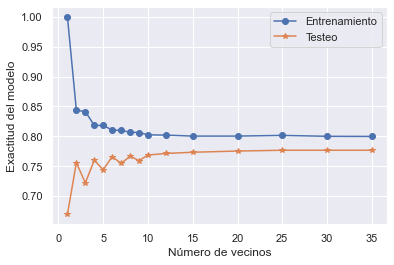

In [33]:
# Gráfica de las profundidades del árbol de decisión vs la exactitud

plt.plot(k_vecinos,accuracy_train,'o-',label='Entrenamiento' )
plt.plot(k_vecinos,accuracy_test,'*-',label='Testeo')
plt.legend()
plt.xlabel('Número de vecinos')
plt.ylabel('Exactitud del modelo')

Con el resultado anterior se determina que el hiperparámetro óptimo para el modelo de vecinos más cercanos es de 11.

## Predicción con Árboles de Desición

A continuación se entrenará un modelo de árboles de decisión con una profundidad o número de ramificaciones igual a 6 de acuerdo a la anterior optimización de los hiperparámetros.

In [34]:
#Árbol de decisión
model1= DecisionTreeClassifier(max_depth=6, random_state=20)

In [35]:
#Entrenamiento del modelo
model1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=20)

In [36]:
#Predicción con los datos de prueba

y_pred= model1.predict(X_test)

La exactitud (accuracy) de este árbol de decisión es de:

In [37]:
# Comparación de las etiquetas pronosticadas con las etiquetas reales

print('La precisión del árbol de decisión es de: ',accuracy_score(y_test,y_pred))

La precisión del árbol de decisión es de:  0.8373333333333334


Las siguientes líneas calculan la matriz de confución con los resultados pronosticados frente a los resultados reales y los representa gráficamente para un mayor entendimiento y para el cálculo más adelante de la "Exhaustividad" del modelo.

In [38]:
#Matriz de confusión del árbol de decisión

print(confusion_matrix(y_test,y_pred))

[[1090   75]
 [ 169  166]]


Estas matrices de confusión indican que el modelo pronosticó correctamente la permanencia de 1.090 clientes y la fuga de 166 clientes, pero fallo en el pronóstico de la fuga de 75 y en la permanencia de 169 clientes ya que su comportamiento real fue contrario.

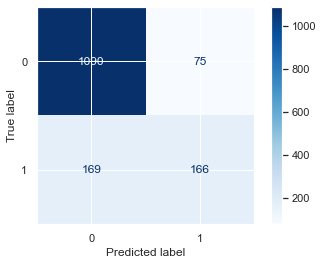

In [39]:
#Matriz de confusión gráfica

plot_confusion_matrix(model1, X_test, y_test, cmap=plt.cm.Blues, values_format = '.0f')

Las siguientes líneas de código presentan el número de clases pronosticadas (0-permanencia, 1-fuga), el número de variables o features utilizadas por el modelo y el nivel de importancia de las mismas:

In [40]:
 print(model1.classes_)              #clases pronosticadas
print(model1.n_classes_)             #número de clases pronosticadas
print(model1.max_features_)          #número de variables utilizadas por el modelo
print(model1.feature_importances_)   #Importancia de las variables para el modelo

[0 1]
2
5
[0.01934763 0.46067967 0.08321371 0.41566244 0.02109655]


C:\Users\jchaverr\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


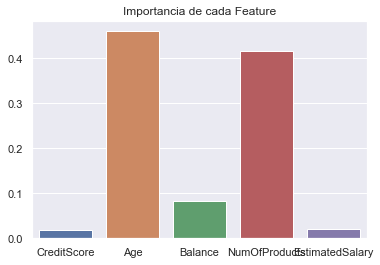

In [41]:
#Gráfico de importancia de las variables

importances = model1.feature_importances_
columns = X_test.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

En la información anterior se aprecia cómo con estas variables y el hiperparámetro seleccionado, la edad y el número de productos del cliente pasaron a ser las variables con mayor importancia para el árbol de decisión.

El siguiente gráfico proporcino mayor información técnica del árbol de decisión utilizado, sólo se grafica hasta el segundo nivel de profundidad para una mejor visualización del gráfico.

In [42]:
from sklearn import tree

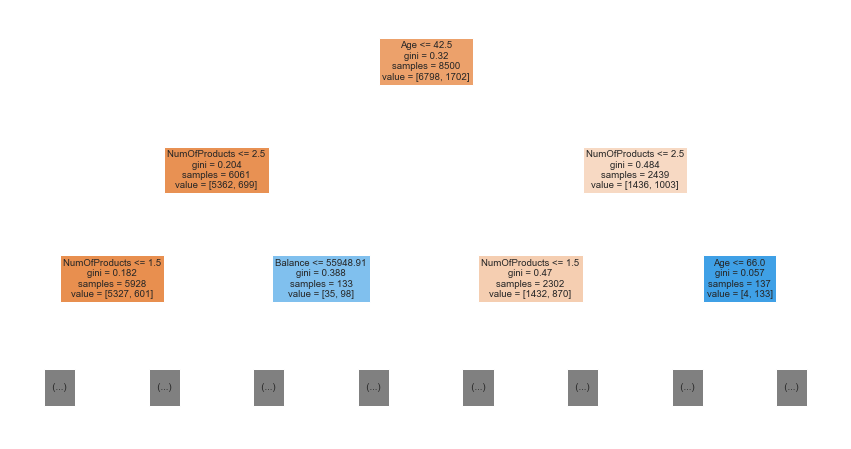

In [43]:
#Gráfico del árbol de decisión

plt.figure(figsize=(15,8))
tree.plot_tree(model1, max_depth= 2,filled = True, feature_names= X_test.columns)
plt.show()

### Precisión, Exhaustividad, F-Score y Soporte

Con la siguiente sentencia se calcularán las métricas de precisión, exhaustividad, f-score y número de aciertos (soporte) del modelo por clase, es decir, por situación posible objetivo: permanencia o fuga.

In [44]:
from sklearn.metrics import precision_recall_fscore_support

In [45]:
#Precisión, exhaustividad (recall), f-score y soporte del árbol de decisión

precision_recall_fscore_support(y_test, y_pred, pos_label= 1)

(array([0.86576648, 0.68879668]),
 array([0.93562232, 0.49552239]),
 array([0.89933993, 0.57638889]),
 array([1165,  335], dtype=int64))

Los cuatro arreglos anteriores informan la precisión, la exhaustivida, el f-score y soporte en el orden indicado. Adicionalmente, la primera columna indica el resultado respecto al objetivo de predecir la clase 0-permanencia y la segunda columna respecto al objetivo de predecir la clase 1-Fuga.

Por lo tanto, tendiendo en cuenta que nuestro objetivo es predecir la fuga de clientes, nuestro interés radica en la segunda columna, así que las métricas de este modelo son las siguientes:
### Precisión = 68,9%
### Exhaustividad = 49,6%
### F-Score = 57,6%

A pesar de que modelo cuenta con una Exactitud (accuracy) del 83,7% en sus predicciones, recordemos que la métrica de evaluación del modelo es la Exhaustividad con un rendimiento del 49,5% en la predicción de fuga de clientes, lo cual quiere decir que el modelo tiene la capacidad de predecir sólo el 50% de los casos de clientes que realmente se fugan o se retiran de la entidad financiera como clientes.

## Predicción con Vecinos Cercanos

A continuación se entrenará un modelo de vecinos más cercanos con una profundidad o número de vecinos igual a 11

In [46]:
# Modelo de vecinos cercanos

modelo2= KNeighborsClassifier(n_neighbors= 11)

In [47]:
#Entrenamiento del modelo

modelo2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [48]:
#Predicción con los datos de prueba
y_pred= modelo2.predict(X_test)

La exactitud del modelo de vecinos más cercanos es la siguiente:

In [49]:
# Comparación de pronosticadas con las etiquetas reales
print('La exactitud del modelo de vecinos es de: ',accuracy_score(y_test,y_pred))

La exactitud del modelo de vecinos es de:  0.7673333333333333


La matriz de confusión y su representación gráfica para este modelo se presenta a continuación:

In [50]:
#Matriz de confusión de los resultados pronosticados vs los resultados reales
print(confusion_matrix(y_test,y_pred))

[[1140   25]
 [ 324   11]]


Estas matrices de confusión indican que el modelo de vecinos cercanos pronosticó correctamente la fuga de 11 clientes y la permanencia de 1.140, pero se equivocó en la predicción de fuga de 25 clientes y lo más grave se equivoca en la predicción de la permanencia de 324 clientes quienes en realidad se fugan.

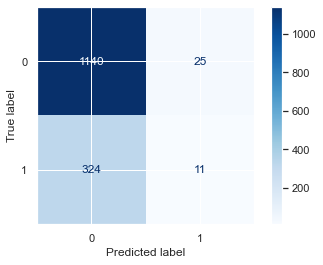

In [51]:
#Representación gráfica de la matriz de confusión
plot_confusion_matrix(modelo2, X_test, y_test, cmap=plt.cm.Blues, values_format = '.0f')

### Precisión, Exhaustividad y F-Score Vecinos más Cercanos

Con la siguiente sentencia se calcularán las métricas de precisión, exhaustividad, f-score y número de casos reales (soporte) del modelo por clase, es decir, por situación posible objetivo: permanencia o fuga.

In [52]:
#Métricas de precisión, exhaustividad y f-score en vecinos cercanos

precision_recall_fscore_support(y_test, y_pred, pos_label= 1)

(array([0.77868852, 0.30555556]),
 array([0.97854077, 0.03283582]),
 array([0.8672499 , 0.05929919]),
 array([1165,  335], dtype=int64))

Aunque este modelo ofrece una exactitud de 76,7% en sus predicciones, las métricas anteriores son menos alentadoras y en especial la de exhaustividad, las cuales se indican más claramente a continuación:

### Precisión = 30,6%
### Exhaustividad = 3,3%
### F-Score = 5,9%

Los resultados anteriores son consecuencia de los expresado por la matriz de confusión en la cual se observa que el modelo sólo fue capaz de predecir correctamente la fuga de 11 clientes sobre un total de 335 clientes que se fugaron de la entidad.

# ELECCIÓN DEL MODELO A UTILIZAR

En resumen, se puede decir que se cuenta con los siguientes 4 modelos para la predicción de la fuga de clientes de una entidad financiera utilizando como varables predictoras el Score de crédito, la edad, el saldo (Balance), el número de productos y el salario estimado:
- Modelo Benchmark que supone que todos los clientes se fugan
- Modelo Benchmark que supone que ningún cliente se fuga
- Un modelo de árboles de decisión con 6 niveles de profundidad.
- Un modelo de vecinos cercanos basado en los 11 vecinos más cercanos.

Para la elección del modelo que nos ofrece el mejor desempeño revisemos nuevamente los siguientes indicadores:

Métrica	Todos fugan	Ninguno fuga	Árbol decisión	Vecinos cercanos
Accuracy	20,40%	79,60%	83,70%	76,70%
Precisión	20,40%	0.0%	68,90%	30,60%
Exhaustividad	100%	0.0%	49,60%	3,30%
F-score	-	-	57,60%	5,90%
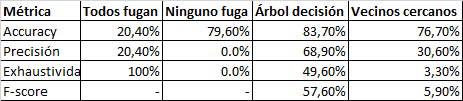

Si para este caso de estudio fuera igual de relevante acertar tanto en los clientes que no se fugan como en los clientes que se fugan, seguramente se diría que el modelo con mejor desempeño es el árbol de decisión con una exactitud del 83,4% en sus predicciones, seguido del escenario en el cual se supone que ningún cliente se fuga. Importante tener claro que según la información recolectada para el desarrollo de estos modelos, acutualmente la entidad financiera presenta una fuga de clientes del (2.037/10.000)=20,4%.

Por otra parte, si se revisa rápidamente los diferentes indicadores para cada modelo se diría que el árbol de decisión es el que presenta las mejores métricas a excepción de la exhaustividad en el cual el escenario del modelo Benchmark en el que todos los clientes se fugan tiene una exhaustividad del 100%; la cual es precisamente la métrica de interés (lograr el mejor desempeño en la predicción de los clientes que se fugan).

A pesar de lo mencionado en el último párrafo, no es viable para el entidad financiera seleccionar el modelo que supone que todos los clientes se fugan ya cualquier acción que quiera tomar la entidad para la retención de dichos clientes sería demasiado costosa y podo efectiva al abordar al 79,6% de clientes que ya sabemos que no se fugarán. Es por esto que el mejor modelo propuesto para la predicción de fugas será el "árbol de decisión" con una exhaustividad del 49,6%.

Con el árbol de decisión, la entidad financiera estará en la capacidad de identificar el 50% de clientes que piensan retirarse y en el mejor de los casos, al adelantar actividades para la retención de estos clientes, tiene la posibilidad de reducir su tasa de fuga hasta un 11% aproximadamente. 

## Oportunidad de mejora

Para finalizar este análisis, se identifica como oportunidad de mejora la exploración de otros modelos de predicción ya sea reduciendo las variables predictoras eliminando aquellas que presentaron un nivel de importancia muy bajo o explorando con otra combinación de variables predictoras, para lo cual lo ideal sería repetir los pasos desde el numeral 3.